In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
root_path = r'D:\Jupyter Notebook\python_for_engineering'

# Covid Dataset
## Import CSV
The dataset is located on https://covid19.who.int

In [3]:
covid_df = pd.read_csv(r'https://covid19.who.int/WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])

In [4]:
covid_df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


### Change column names

In [5]:
new_column_names = ['Date', 'Code', 'Country', 'WHO', 'NCase', 'CumCase', 'NDeath', 'CumDeath']
covid_df.columns = new_column_names

In [6]:
covid_df.head()

,Date,Code,Country,WHO,NCase,CumCase,NDeath,CumDeath
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69090 entries, 0 to 69089
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      69090 non-null  datetime64[ns]
 1   Code      68796 non-null  object        
 2   Country   69090 non-null  object        
 3   WHO       69090 non-null  object        
 4   NCase     69090 non-null  int64         
 5   CumCase   69090 non-null  int64         
 6   NDeath    69090 non-null  int64         
 7   CumDeath  69090 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.2+ MB


> Code column is missing 294 values.
> Date column was correctly parsed to *datetime* format.

In [8]:
covid_df.describe()

,NCase,CumCase,NDeath,CumDeath
count,69090.000000,6.909000e+04,69090.000000,69090.000000
mean,594.947836,4.674525e+04,16.331235,1733.900246
std,4058.730284,3.428227e+05,108.533197,10656.502303
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,2.350000e+02,0.000000,4.000000
75%,72.000000,5.572750e+03,1.000000,107.000000
max,97894.000000,8.184788e+06,6409.000000,219497.000000


In [51]:
country_by_death = covid_df[['Country', 'CumDeath']].groupby('Country').sum()
country_by_death.head()

,CumDeath
Country,
Afghanistan,171364
Albania,32432
Algeria,211968
AmericanSamoa,0
Andorra,10061


### Add Year, Month and Day columns

In [10]:
dates_df = pd.DataFrame(
    data=[[date.day, date.month, date.year] for date in covid_df['Date']],
    columns=['Day', 'Month', 'Year'],
)

covid_df = pd.concat([covid_df['Date'], dates_df, covid_df.iloc[:, 1:]], axis=1)

In [11]:
covid_df.head()

,Date,Day,Month,Year,Code,Country,WHO,NCase,CumCase,NDeath,CumDeath
0,2020-01-03,3,1,2020,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,4,1,2020,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,5,1,2020,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,6,1,2020,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,7,1,2020,AF,Afghanistan,EMRO,0,0,0,0


### Strip the strings in Country column, erase all signs that are not letters.

In [12]:
covid_df['Country'] = covid_df['Country'].apply(lambda x: ''.join(filter(str.isalpha, x)).strip())

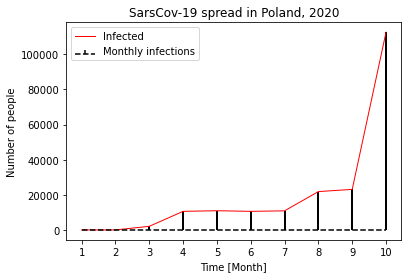

In [95]:
infected_by_month = covid_df.loc[(covid_df.Year == 2020) & (covid_df.Country == 'Poland'), ['Month', 'NCase']].groupby('Month').sum()

plt.plot(infected_by_month, label='Infected', linewidth=1, color='r')

markerline, stemlines, baseline = plt.stem(np.arange(1, covid_df.Month.max() + 1), infected_by_month.NCase.values, 'k', markerfmt='none', label='Monthly infections')
plt.setp(stemlines, color='k', linewidth=2)
plt.setp(baseline, color='k', linestyle='--')
plt.xlabel('Time [Month]'), plt.ylabel('Number of people')
plt.xticks(np.arange(1, covid_df.Month.max() + 1, 1))
plt.title('SarsCov-19 spread in Poland, 2020')
plt.legend()
plt.show()

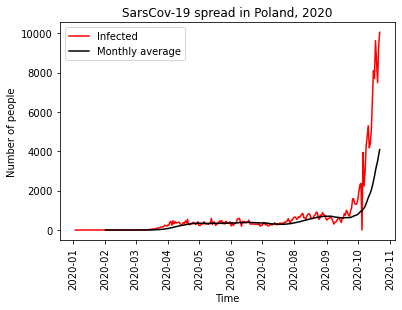

In [96]:
infected_by_date = covid_df.loc[covid_df.Country == 'Poland', ['Date', 'NCase']].groupby('Date').sum()

plt.plot(infected_by_date.index, infected_by_date.NCase, color='r', label='Infected')
plt.plot(infected_by_date.rolling(window=30).mean(), 'k', label='Monthly average')
plt.title('SarsCov-19 spread in Poland, 2020')
plt.xlabel('Time'), plt.ylabel('Number of people')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Population Dataset
### Import Population by Country CSV
This dataset is provided by Kaggle under

In [14]:
population_df = pd.read_csv(os.path.join(root_path, 'data\csv\population_by_country_2020.csv'))

In [15]:
population_df.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [16]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


> Migrants column has 34 missing values